In [91]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## less Important
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score
## Algorithms
from sklearn.linear_model import Perceptron


## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

### Perceptron for binary Classification

In [2]:
## load iris
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.int64)  ## for binary classification

## create the model
percep_clf = Perceptron()
percep_clf.fit(X, y)

y_pred_train = percep_clf.predict(X)

train_score = accuracy_score(y, y_pred_train)
print('train_score =>', train_score)

train_score => 0.96


### `Sequential Models`

### Building a Sequential API for multiclass Classification

`Fashion MNIST`

#### Loading the Data and Look at the big Picture  

In [4]:
## loading the Fashion MNIST 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## show shapes, dtypes and transfer datatypes to (float32, enough for NN)
## and rescale the inputs to be from (0-1)

X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')

X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

## split train to train & val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.1, shuffle=True)


print('X_train_full shape =>', X_train_full.shape)
print('y_train_full shape =>', y_train_full.shape)
print('==='*15)
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('==='*15)
print('X_val shape =>', X_val.shape)
print('y_val shape =>', y_val.shape)
print('==='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)
print('==='*25)
print('X_train , y_train -- dtypes =>', (X_train.dtype, y_train.dtype))
print('X_val , y_val -- dtypes =>', (X_val.dtype, y_val.dtype))
print('X_test , y_test -- dtypes =>', (X_test.dtype, y_test.dtype))

X_train_full shape => (60000, 28, 28)
y_train_full shape => (60000,)
X_train shape => (54000, 28, 28)
y_train shape => (54000,)
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
X_test shape => (10000, 28, 28)
y_test shape => (10000,)
X_train , y_train -- dtypes => (dtype('float32'), dtype('int32'))
X_val , y_val -- dtypes => (dtype('float32'), dtype('int32'))
X_test , y_test -- dtypes => (dtype('float32'), dtype('int32'))


In [5]:
## what about the target
## each target is represented by numbers , if we plot these matrices according to its numbers
## we will get the corresponding photo to each number , i will do that 

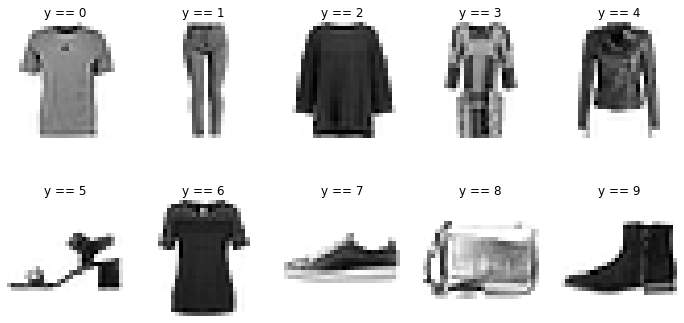

In [6]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])

## get first index only i need only one unique value to test to 
## what this number belong to what photo (i hope you understand me)
## although the images are diffrent for each class_name < like (coats have diffrent images)
## but still have the same number of target, that what i only want

img_indicies = {}

for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]   

    
keys = list(img_indicies.keys())

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

plt.sca(ax[0,0])
plt.imshow(X_train[img_indicies[0]], cmap='binary')
plt.title(f'y == {keys[0]}')
plt.axis('off')
plt.sca(ax[0,1])
plt.imshow(X_train[img_indicies[1]], cmap='binary')
plt.title(f'y == {keys[1]}')
plt.axis('off')
plt.sca(ax[0,2])
plt.imshow(X_train[img_indicies[2]], cmap='binary')
plt.title(f'y == {keys[2]}')
plt.axis('off')
plt.sca(ax[0,3])
plt.imshow(X_train[img_indicies[3]], cmap='binary')
plt.title(f'y == {keys[3]}')
plt.axis('off')
plt.sca(ax[0,4])
plt.imshow(X_train[img_indicies[4]], cmap='binary')
plt.title(f'y == {keys[4]}')
plt.axis('off')

###################
plt.sca(ax[1,0])
plt.imshow(X_train[img_indicies[5]], cmap='binary')
plt.title(f'y == {keys[5]}')
plt.axis('off')
plt.sca(ax[1,1])
plt.imshow(X_train[img_indicies[6]], cmap='binary')
plt.title(f'y == {keys[6]}')
plt.axis('off')
plt.sca(ax[1,2])
plt.imshow(X_train[img_indicies[7]], cmap='binary')
plt.title(f'y == {keys[7]}')
plt.axis('off')
plt.sca(ax[1,3])
plt.imshow(X_train[img_indicies[8]], cmap='binary')
plt.title(f'y == {keys[8]}')
plt.axis('off')
plt.sca(ax[1,4])
plt.imshow(X_train[img_indicies[9]], cmap='binary')
plt.title(f'y == {keys[9]}')
plt.axis('off')
plt.show()

In [7]:
### you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle_Boot']


## you can now work like this

print('y_train in row 1 =>', y_train[0])
print('get its corresponding class =>', class_names[y_train[0]])

y_train in row 1 => 0
get its corresponding class => T_Shirt


### `Build the Model`

In [8]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image
model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, activation='relu'))
model_fashion.add(tf.keras.layers.Dense(100, activation='relu'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

model_fashion.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
## show the layers
model_fashion.layers

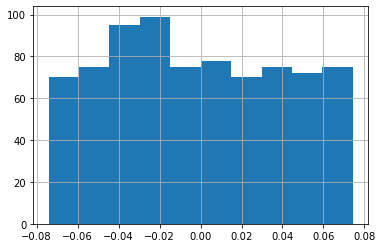

In [27]:
### bias and weights ==> initialization 
## we will look at many initialization techniques later, by default it is (glorot_uniform) init.
weights, biases = model_fashion.layers[1].get_weights()
## returns initialization randomly of weights , their are many techniques as i said
## for biases , their init. =

## choose any features to show 
pd.DataFrame(weights).iloc[:,5].hist() ;  ## look as i said it is uniformly distributed :D

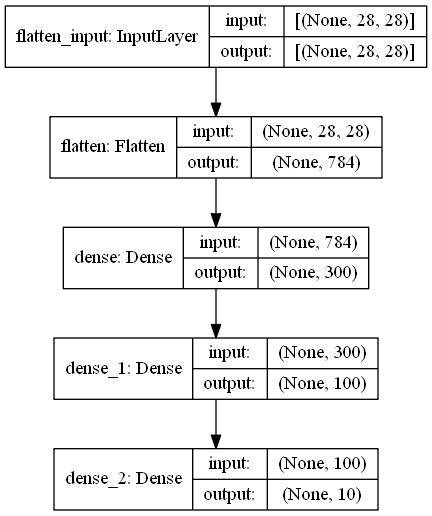

In [10]:
## you can also plot the model
tf.keras.utils.plot_model(model_fashion, show_shapes=True)

In [11]:
## compile Model
model_fashion.compile(loss='sparse_categorical_crossentropy', 
                      optimizer='sgd', 
                      metrics=['accuracy'])

## Save the Model
model_fashion.save('fashion_MNIST_Model.h5')

## load the Model
model_loaded_fashion = tf.keras.models.load_model('fashion_MNIST_Model.h5')

In [12]:
## Model CheckPoint
check_point = tf.keras.callbacks.ModelCheckpoint('fashion_MNIST_Model.h5')

## early_stopping callback to reduce overfitting
early_stopp = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=10, restore_best_weights=True)

## after you make a CheckPoint you should compile the model again
model_loaded_fashion.compile(loss='sparse_categorical_crossentropy', 
                             optimizer='sgd', 
                             metrics=['accuracy'])
## train the Model
history = model_loaded_fashion.fit(X_train, y_train, 
                                    validation_data=(X_val, y_val), epochs=50, 
                                    callbacks=[early_stopp, check_point])

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.7159 - accuracy: 0.7670 - val_loss: 0.5280 - val_accuracy: 0.8272
Epoch 2/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4854 - accuracy: 0.8298 - val_loss: 0.4988 - val_accuracy: 0.8237
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4394 - accuracy: 0.8465 - val_loss: 0.4585 - val_accuracy: 0.8450
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4133 - accuracy: 0.8557 - val_loss: 0.4318 - val_accuracy: 0.8542
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3935 - accuracy: 0.8616 - val_loss: 0.4079 - val_accuracy: 0.8633
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3766 - accuracy: 0.8678 - val_loss: 0.4851 - val_accuracy: 0.8278
Epoch 7/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3637 - accuracy: 0.8730 - val_loss: 0.4015 - val_accuracy:

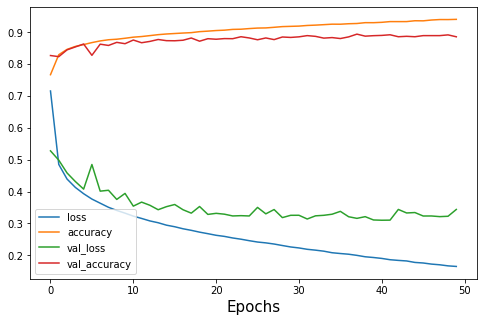

In [37]:
## plotting training and validation

history_info = history.history

pd.DataFrame(history_info).plot(figsize=(8, 5))
plt.xlabel('Epochs', fontsize=15)
plt.legend(loc='lower left')
plt.show()

loss_test => 0.3531602621078491
acc_test => 0.8797000050544739
values of prediction =>
 [9 2 1]

getting equivalent class_names of these numbers

y_predc_names ==> 
 ['Ankle_Boot', 'Pullover', 'Trouser']


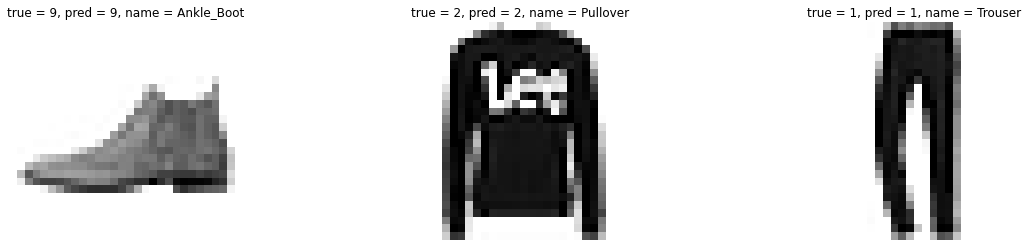

In [77]:
## evaluate on test set

loss_test, acc_test = model_loaded_fashion.evaluate(X_test, y_test, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)   ## Not Bad


print('==='*20)

## to predict some data
X_new = X_test[:3]
y_new = y_test[:3]

y_predc = np.argmax(model_loaded_fashion.predict(X_new), axis=-1)
print('values of prediction =>\n', y_predc)
print()
print('getting equivalent class_names of these numbers')
print()
## to get thier class_names < as mentioned before
y_predc_names = [class_names[y_predc[i]] for i in range(len(y_predc))]  
## OR this code also works ====> np.array(class_names)[y_predc]

print('y_predc_names ==> \n', y_predc_names)

## visualize what we get in this cell
print('==='*25)
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

plt.sca(ax[0])
plt.imshow(X_new[0], cmap='binary')
plt.title(f'true = {y_new[0]}, pred = {y_predc[0]}, name = {y_predc_names[0]}')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(X_new[1], cmap='binary')
plt.title(f'true = {y_new[1]}, pred = {y_predc[1]}, name = {y_predc_names[1]}')
plt.axis('off')
plt.sca(ax[2])
plt.imshow(X_new[2], cmap='binary')
plt.title(f'true = {y_new[2]}, pred = {y_predc[2]}, name = {y_predc_names[2]}')
plt.axis('off');

### Regression Task

In [143]:
## load the data
housing = datasets.fetch_california_housing()

X = housing['data']
y = housing['target']

## split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

## split to train and val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, shuffle=True)


## scaling the data
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_val = my_scaler.transform(X_val)
X_test = my_scaler.transform(X_test)


print('X_housing shape =>', housing['data'].shape)
print('y_housing shape =>', housing['target'].shape)
print('==='*15)
print('X_train_full shape =>', X_train_full.shape)
print('y_train_full shape =>', y_train_full.shape)
print('==='*15)
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('==='*15)
print('X_val shape =>', X_val.shape)
print('y_val shape =>', y_val.shape)
print('==='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_housing shape => (20640, 8)
y_housing shape => (20640,)
X_train_full shape => (18576, 8)
y_train_full shape => (18576,)
X_train shape => (14860, 8)
y_train shape => (14860,)
X_val shape => (3716, 8)
y_val shape => (3716,)
X_test shape => (2064, 8)
y_test shape => (2064,)


In [144]:
## Build the Model

model_housing = tf.keras.models.Sequential()

model_housing.add(tf.keras.layers.InputLayer([8]))
model_housing.add(tf.keras.layers.Dense(10, activation='relu'))
model_housing.add(tf.keras.layers.Dense(1, activation=None))  ## one output value without activation

model_housing.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


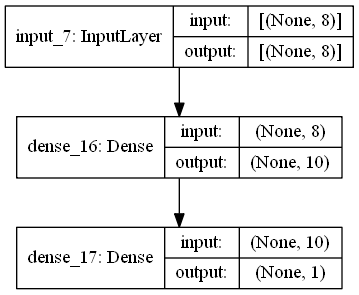

In [145]:
## plot the model
tf.keras.utils.plot_model(model_housing, show_shapes=True, show_layer_names=True)

In [146]:
## compile the model
model_housing.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])


early_stopp = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
## fit the model
histroy = model_housing.fit(X_train, y_train, 
                            validation_data=(X_val, y_val), 
                            epochs=30, batch_size=32, callbacks=[early_stopp])

Epoch 1/30
465/465 [==============================] - 3s 6ms/step - loss: 1.7101 - mae: 0.9677 - val_loss: 0.7689 - val_mae: 0.6422
Epoch 2/30
465/465 [==============================] - 3s 6ms/step - loss: 0.6368 - mae: 0.5752 - val_loss: 0.5801 - val_mae: 0.5457
Epoch 3/30
465/465 [==============================] - 3s 7ms/step - loss: 0.6221 - mae: 0.5161 - val_loss: 0.5103 - val_mae: 0.5120
Epoch 4/30
465/465 [==============================] - 3s 7ms/step - loss: 0.5759 - mae: 0.4924 - val_loss: 0.4781 - val_mae: 0.4959
Epoch 5/30
465/465 [==============================] - 3s 7ms/step - loss: 0.5291 - mae: 0.4791 - val_loss: 0.4632 - val_mae: 0.4916
Epoch 6/30
465/465 [==============================] - 3s 6ms/step - loss: 0.4827 - mae: 0.4723 - val_loss: 0.4561 - val_mae: 0.4808
Epoch 7/30
465/465 [==============================] - 3s 6ms/step - loss: 0.4531 - mae: 0.4671 - val_loss: 0.4430 - val_mae: 0.4846
Epoch 8/30
465/465 [==============================] - 3s 7ms/step - loss: 0.

In [147]:
## save the Model
model_housing.save('Housing_Model.h5')

## ` Functional API`

`i will apply Functional API and subclassing to above Regression Task`

`Model 1 ==> Functional`

In [148]:
X_train.shape[1:]

(8,)

In [149]:
## Build your Model
## i will plot it below to pure understanding what i am trying to do

## input layer , in functional API use Input instead of InputLayer
input_total = tf.keras.layers.Input([X_train.shape[1]])
## two hidden layers
hidden_1 = tf.keras.layers.Dense(30, activation='relu')(input_total)
hidden_2 = tf.keras.layers.Dense(30, activation='relu')(hidden_1)
## conact both hidden_2 with input_total
concat = tf.keras.layers.concatenate([input_total, hidden_2])
output = tf.keras.layers.Dense(1, activation=None)(concat)

## get the Model
model_func = tf.keras.Model(inputs=[input_total], outputs=[output])

model_func.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           270         input_8[0][0]                    
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 30)           930         dense_18[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 38)           0           input_8[0][0]                    
                                                                 dense_19[0][0]             

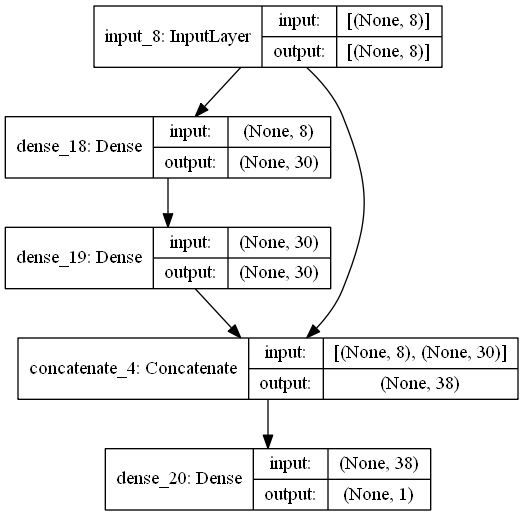

In [150]:
## plot the model
tf.keras.utils.plot_model(model=model_func, show_layer_names=True, show_shapes=True)
## i think it is clear now what i am trying to do, now you can combile and build your model

In [151]:
## compile the model
model_func.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])


early_stopp = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
## fit the model
histroy = model_func.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=30, batch_size=32, callbacks=[early_stopp])

Epoch 1/30
465/465 [==============================] - 4s 8ms/step - loss: 0.9665 - mae: 0.6731 - val_loss: 0.4937 - val_mae: 0.5047
Epoch 2/30
465/465 [==============================] - 4s 8ms/step - loss: 0.5527 - mae: 0.4686 - val_loss: 0.4484 - val_mae: 0.4617
Epoch 3/30
465/465 [==============================] - 4s 8ms/step - loss: 0.5417 - mae: 0.4487 - val_loss: 0.4053 - val_mae: 0.4471
Epoch 4/30
465/465 [==============================] - 4s 8ms/step - loss: 0.4362 - mae: 0.4350 - val_loss: 0.3826 - val_mae: 0.4424
Epoch 5/30
465/465 [==============================] - 4s 8ms/step - loss: 0.3813 - mae: 0.4265 - val_loss: 0.3683 - val_mae: 0.4276
Epoch 6/30
465/465 [==============================] - 3s 8ms/step - loss: 0.3515 - mae: 0.4160 - val_loss: 0.3638 - val_mae: 0.4337
Epoch 7/30
465/465 [==============================] - 3s 7ms/step - loss: 0.3437 - mae: 0.4101 - val_loss: 0.3559 - val_mae: 0.4193
Epoch 8/30
465/465 [==============================] - 4s 8ms/step - loss: 0.

In [152]:
## save the Model
model_func.save('Housing_Model_functional_1.h5')

`Model 2 ==> Functional`

In [153]:
## for input A and B respectively
A_shape = X_train[:, :5].shape
B_shape = X_train[:, 5:].shape  

print('A_shape =>', A_shape)
print('B_shape =>', B_shape)
## here i deceided to take take the first 5 features as Input_A, and other 3 features as Input_B

A_shape => (14860, 5)
B_shape => (14860, 3)


In [154]:
## Build the Model

## InputLayers
## in functional API use Input instead of InputLayer
input_A = tf.keras.layers.Input(A_shape[1], name='input_A')
input_B = tf.keras.layers.Input(B_shape[1], name='input_B')
## Hidden Layers
hidden_1 = tf.keras.layers.Dense(30, activation='relu', name='hidden_1')(input_B)
hidden_2 = tf.keras.layers.Dense(30, activation='relu', name='hidden_2')(hidden_1)
# concat and output
concat = tf.keras.layers.concatenate([input_A, hidden_2])
output = tf.keras.layers.Dense(1, activation=None, name='output')(concat)
# get the model
model_func = tf.keras.Model(inputs=[input_A, input_B], outputs=[output])

model_func.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_B (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 30)           120         input_B[0][0]                    
__________________________________________________________________________________________________
input_A (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden_2 (Dense)                (None, 30)           930         hidden_1[0][0]                   
____________________________________________________________________________________________

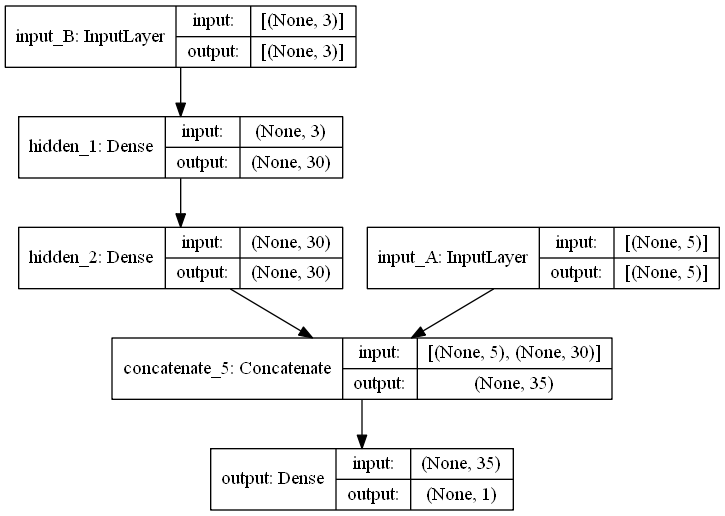

In [155]:
## plot the model
tf.keras.utils.plot_model(model_func, show_layer_names=True, show_shapes=True)  
## i think it is now clear what this complex model is
## you can write your custom Model and do what ever you want >>>> AGOOR

In [161]:
### note when you fit the model, it required two inputs and one output  (VERY IMPORTANT!)
## as i did here
X_train_A, X_train_B = X_train[:,:5], X_train[:,5:]
X_val_A, X_val_B = X_val[:,:5], X_val[:,5:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,5:]

## to predict new classes
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_new = y_test[:3]

In [159]:
## you can compile and Build it
## compile the model
model_func.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])


early_stopp = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

## fit the model
### note when you fit the model, it required two inputs and one output
histroy = model_func.fit((X_train_A, X_train_B), y_train, 
                        validation_data=((X_val_A, X_val_B), y_val), 
                        epochs=30, batch_size=32, callbacks=[early_stopp])

Epoch 1/30
465/465 [==============================] - 4s 8ms/step - loss: 1.3796 - mae: 0.8487 - val_loss: 0.7057 - val_mae: 0.6409
Epoch 2/30
465/465 [==============================] - 4s 8ms/step - loss: 0.5200 - mae: 0.5234 - val_loss: 0.4507 - val_mae: 0.4963
Epoch 3/30
465/465 [==============================] - 4s 8ms/step - loss: 0.4059 - mae: 0.4601 - val_loss: 0.4045 - val_mae: 0.4569
Epoch 4/30
465/465 [==============================] - 3s 7ms/step - loss: 0.4462 - mae: 0.4460 - val_loss: 0.3900 - val_mae: 0.4611
Epoch 5/30
465/465 [==============================] - 3s 7ms/step - loss: 0.4153 - mae: 0.4368 - val_loss: 0.3959 - val_mae: 0.4689
Epoch 6/30
465/465 [==============================] - 3s 7ms/step - loss: 0.4105 - mae: 0.4319 - val_loss: 0.3786 - val_mae: 0.4438
Epoch 7/30
465/465 [==============================] - 4s 8ms/step - loss: 0.4028 - mae: 0.4284 - val_loss: 0.3644 - val_mae: 0.4349
Epoch 8/30
465/465 [==============================] - 4s 8ms/step - loss: 0.

In [167]:
## Evaluate on test set
loss_test, acc_test = model_func.evaluate((X_test_A, X_test_B), y_test, verbose=0)
print('loss_test MSE =>', loss_test)
print('acc_test MAE =>', acc_test)

loss_test MSE => 0.3370739817619324
acc_test MAE => 0.40886756777763367


In [168]:
## predict new 
y_predict_new = model_func.predict((X_new_A, X_new_B))
y_predict_new

array([[1.62155  ],
       [1.9012762],
       [2.7911742]], dtype=float32)

### Using TensorBoard for Visualization

`I will try it on one of above projects `

In [188]:
## get this path
this_path = os.path.join(os.curdir, 'my_logs')

import time

## Create a Folder of Logs
def create_log():
    time_now = time.strftime('In_%Y_%m_%d-%H_%M_%S')
    create_path = os.path.join(this_path, time_now)
    return create_path

## path this calling of the above function to Tensorboard callbacks
run_log_dir = create_log()
run_log_dir  ## a path

'.\\my_logs\\In_2021_09_16-21_08_29'

In [183]:
## load the data
housing = datasets.fetch_california_housing()

X = housing['data']
y = housing['target']

## split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

## split to train and val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, shuffle=True)


## scaling the data
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_val = my_scaler.transform(X_val)
X_test = my_scaler.transform(X_test)

In [184]:
## Build the Model

model_housing = tf.keras.models.Sequential()

model_housing.add(tf.keras.layers.InputLayer([8]))
model_housing.add(tf.keras.layers.Dense(10, activation='relu'))
model_housing.add(tf.keras.layers.Dense(1, activation=None))  ## one output value without activation

In [189]:
## compile the model
model_housing.compile(loss='mse', 
                      optimizer=tf.keras.optimizers.SGD(), 
                      metrics=['mae'])


early_stopp = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

## use TensorBoard Callback
tensorboard_cback = tf.keras.callbacks.TensorBoard(run_log_dir)

## fit the model
histroy = model_housing.fit(X_train, y_train, 
                            validation_data=(X_val, y_val), 
                            epochs=30, batch_size=32, callbacks=[early_stopp, tensorboard_cback])

Epoch 1/30
465/465 [==============================] - 3s 6ms/step - loss: 0.3670 - mae: 0.4227 - val_loss: 0.3483 - val_mae: 0.4079
Epoch 2/30
465/465 [==============================] - 3s 6ms/step - loss: 0.3634 - mae: 0.4226 - val_loss: 0.3546 - val_mae: 0.4179
Epoch 3/30
465/465 [==============================] - 2s 5ms/step - loss: 0.3674 - mae: 0.4233 - val_loss: 0.3476 - val_mae: 0.4069
Epoch 4/30
465/465 [==============================] - 3s 6ms/step - loss: 0.3589 - mae: 0.4225 - val_loss: 0.3429 - val_mae: 0.4021
Epoch 5/30
465/465 [==============================] - 3s 6ms/step - loss: 0.3514 - mae: 0.4181 - val_loss: 0.3483 - val_mae: 0.4175
Epoch 6/30
465/465 [==============================] - 2s 5ms/step - loss: 0.3515 - mae: 0.4184 - val_loss: 0.3426 - val_mae: 0.4036
Epoch 7/30
465/465 [==============================] - 2s 5ms/step - loss: 0.3600 - mae: 0.4184 - val_loss: 0.3401 - val_mae: 0.4018
Epoch 8/30
465/465 [==============================] - 3s 5ms/step - loss: 0.

#### where is the tensorboard , well open it

In [190]:
## open the tenorboard
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006    ## you can play with that

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17420), started 0:07:38 ago. (Use '!kill 17420' to kill it.)

### Let's fine Tune this Model

`convert Model to sklearn wrapper`

In [200]:
# create the Function

def build_model(n_layers=2, n_neurons=30, activation='relu', input_shape=[8]):
    ''' this function is set to to tune the Model according to some HyperParameteres
        you can Tune more parameters and tweak as you like
    '''
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape))
    for layer in range(n_layers):
        model.add(tf.keras.layers.Dense(n_neurons, activation=activation))
        
    ## for Regression 
    model.add(tf.keras.layers.Dense(1, activation=None))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    
    return model

## to sklearn wrapper
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg

In [201]:
## complete ordinary steps
## this (keras_reg) now has two layers , layer from sklearn and other from tf.keras
early_stopp = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
## fit the model
histroy = keras_reg.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=30, batch_size=32, callbacks=[early_stopp, tensorboard_cback])

Epoch 1/30
465/465 [==============================] - 6s 12ms/step - loss: 0.8837 - mae: 0.6492 - val_loss: 0.4840 - val_mae: 0.4983
Epoch 2/30
465/465 [==============================] - 4s 8ms/step - loss: 0.4309 - mae: 0.4700 - val_loss: 0.4129 - val_mae: 0.4387
Epoch 3/30
465/465 [==============================] - 4s 8ms/step - loss: 0.3966 - mae: 0.4485 - val_loss: 0.3937 - val_mae: 0.4245
Epoch 4/30
465/465 [==============================] - 4s 8ms/step - loss: 0.3777 - mae: 0.4380 - val_loss: 0.3901 - val_mae: 0.4253
Epoch 5/30
465/465 [==============================] - 3s 7ms/step - loss: 0.3632 - mae: 0.4274 - val_loss: 0.3712 - val_mae: 0.4096
Epoch 6/30
465/465 [==============================] - 4s 8ms/step - loss: 0.3546 - mae: 0.4214 - val_loss: 0.3580 - val_mae: 0.4073
Epoch 7/30
465/465 [==============================] - 4s 8ms/step - loss: 0.3459 - mae: 0.4151 - val_loss: 0.3480 - val_mae: 0.3981
Epoch 8/30
465/465 [==============================] - 3s 7ms/step - loss: 0

In [206]:
## Predict
y_pred_test = keras_reg.predict(X_test)
y_pred_test

array([1.1920191, 1.3160834, 1.4104298, ..., 1.731779 , 1.0933282,
       3.653172 ], dtype=float32)

## You can use GridSearch, RandomizedSearch and any other techniques of Tuning Hyperparameters , but it may take a long time, so stop here